![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Top Hat Filter in Image Processing


In [ ]:
!wget https://www.dropbox.com/s/2nmi80b30ogx8yn/frutos.png

--2023-10-30 13:27:23--  https://www.dropbox.com/s/2nmi80b30ogx8yn/frutos.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2nmi80b30ogx8yn/frutos.png [following]
--2023-10-30 13:27:24--  https://www.dropbox.com/s/raw/2nmi80b30ogx8yn/frutos.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdcf9d820aa5fc678c6c46c0edb.dl.dropboxusercontent.com/cd/0/inline/CGl6O8qD_ecJ5y6xdmlv03ZJezg8GBNNCyL0OwYDFJz0JEY9rvIlr3O8kCoypBosqKv_g3ztgfA8JQVq-Udi37Bcz-IQVLlvzZtfntMgkq_6O-Wk8uuauBV_0inP3_oS3Yg/file# [following]
--2023-10-30 13:27:25--  https://ucdcf9d820aa5fc678c6c46c0edb.dl.dropboxusercontent.com/cd/0/inline/CGl6O8qD_ecJ5y6xdmlv03ZJezg8GBNNCyL0OwYDFJz0JEY9rvIlr3O8kCoypBosqKv_g3ztgfA8JQVq-Udi37Bcz-IQVLlvzZtfntMgkq_6O-Wk8uuauBV_0inP3_oS3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

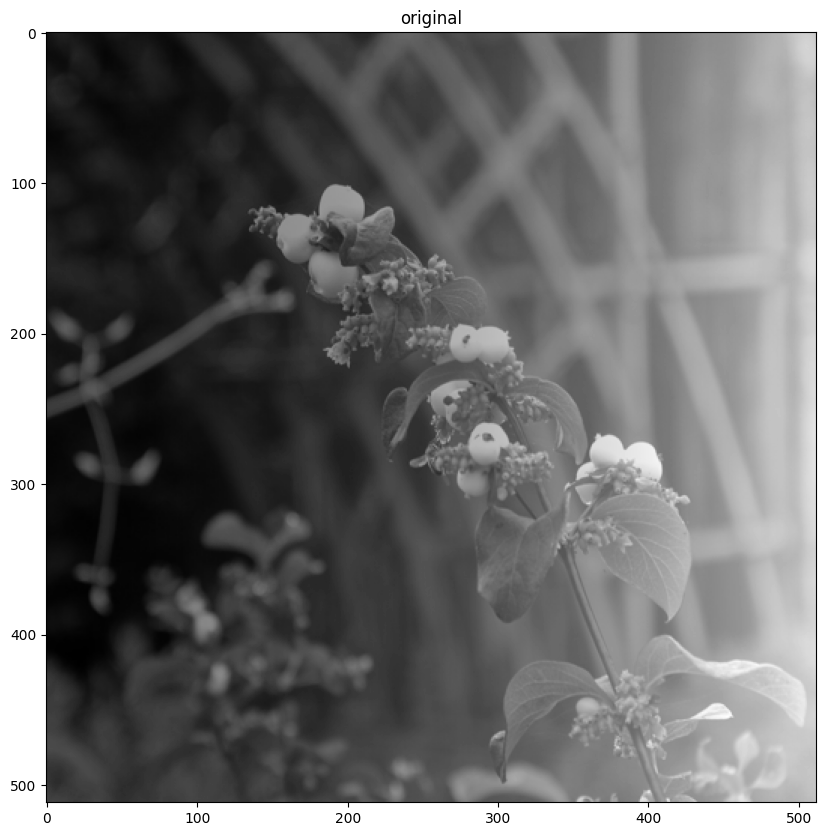

In [ ]:
X = cv2.imread('frutos.png',0)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.title('original')
plt.show()

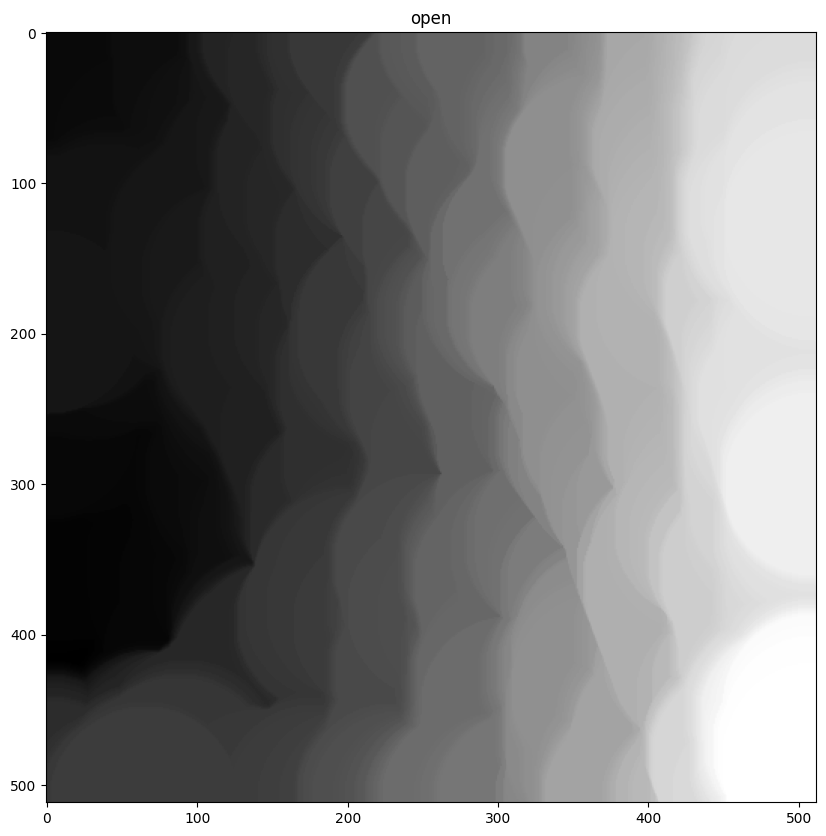

In [ ]:
n = 120

Xe = cv2.morphologyEx(X, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n,n)))



plt.figure(figsize=(10,10))
plt.imshow(Xe,cmap='gray')
plt.title('open')
plt.show()

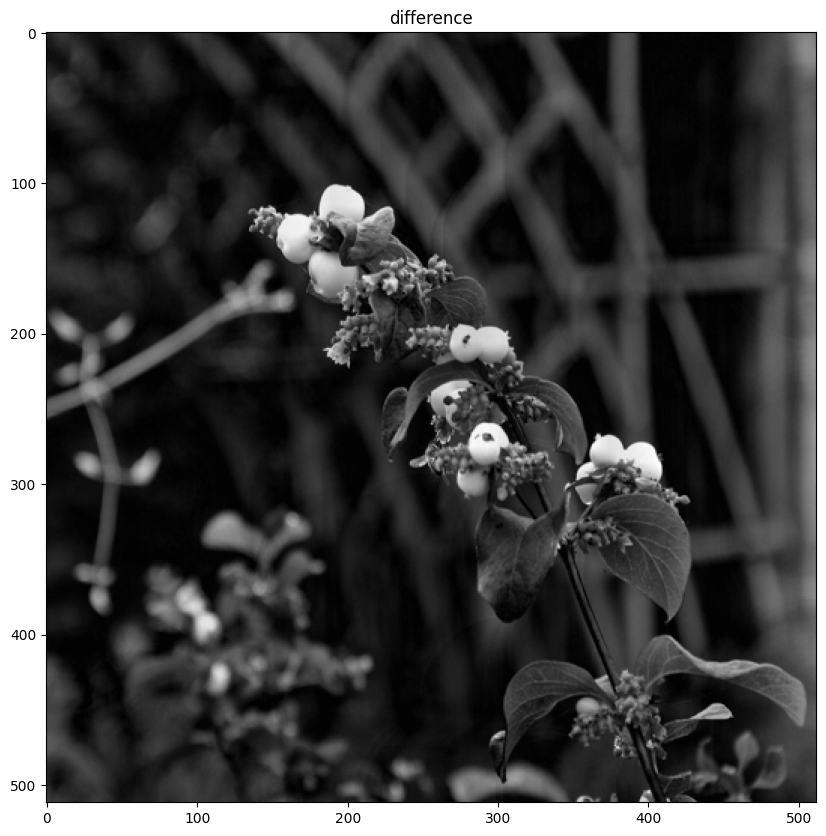

In [ ]:
Xd = X.astype(float) -Xe.astype(float)
plt.figure(figsize=(10,10))
plt.imshow(Xd,cmap='gray')
plt.title('difference')
plt.show()


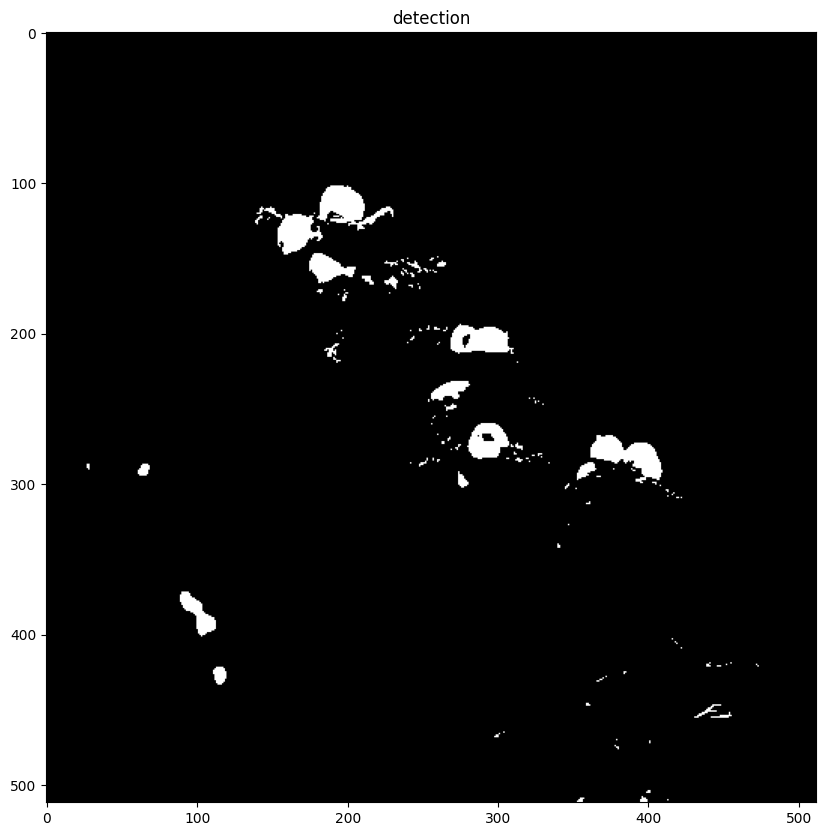

In [ ]:
th = 80
D = Xd>th
plt.figure(figsize=(10,10))
plt.imshow(D,cmap='gray')
plt.title('detection')
plt.show()



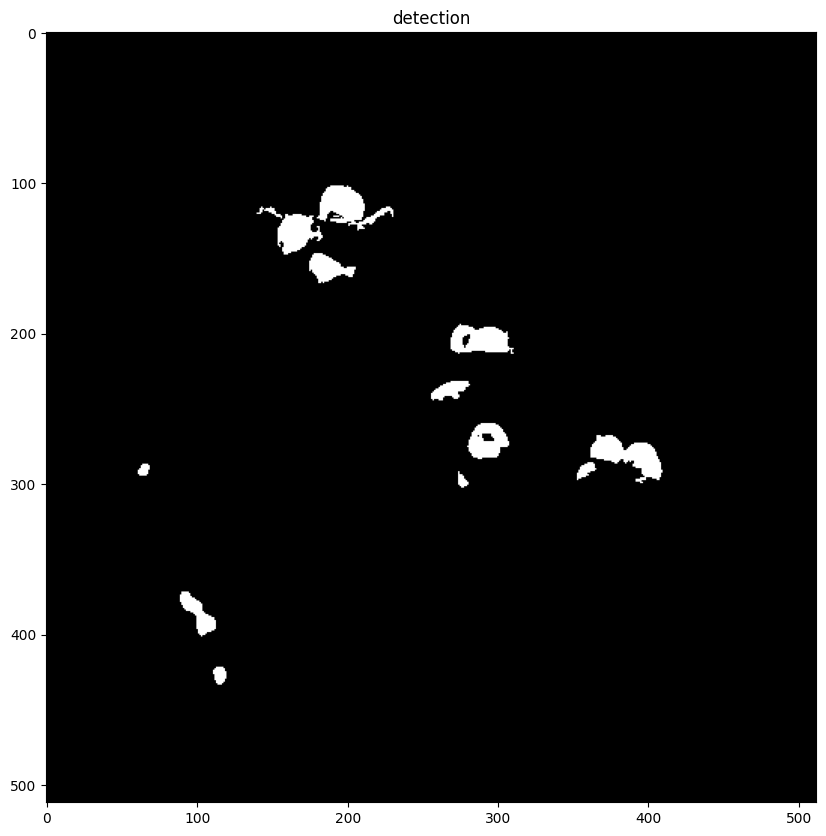

In [ ]:
from skimage import morphology
S = morphology.remove_small_objects(D, min_size=40, connectivity=2)
plt.figure(figsize=(10,10))
plt.imshow(S,cmap='gray')
plt.title('detection')
plt.show()


In [ ]:
from skimage.morphology import binary_dilation
from skimage.segmentation import clear_border


from skimage.color import label2rgb
from skimage.measure import label

def binview(img, mask, color='r', dilate_pixels=1):
    """
    Displays a gray or color image 'img' overlaid by color pixels determined a by binary image 'mask'. It is useful to
    display the edges of an image.

    Args:
        img: gray scale image (X-ray)
        mask: binary image that works as mask
        color: string to define pixel color.
                'r': red (default)
                'g': green
                'b': blue
                'y': yellow
                'c': cyan
                'm': magenta
                'k': black
                'w': white

        dilate_pixels (int): Number of pixels used for dilate the mask.

    Returns:
        img_color (ndarray): output image with a mask overlaid.
    """

    # Defines colors
    # colors = {
    #     'r': np.array([255, 0, 0]),
    #     'g': np.array([0, 255, 0]),
    #     'b': np.array([0, 0, 255]),
    #     'y': np.array([255, 255, 0]),
    #     'c': np.array([0, 255, 255]),
    #     'm': np.array([255, 0, 255]),
    #     'k': np.array([0, 0, 0]),
    #     'w': np.array([255, 255, 255])
    # }
    #
    colors = {
        'r': np.array([1, 0, 0]),
        'g': np.array([0, 1, 0]),
        'b': np.array([0, 0, 1]),
        'y': np.array([1, 1, 0]),
        'c': np.array([0, 1, 1]),
        'm': np.array([1, 0, 1]),
        'k': np.array([0, 0, 0]),
        'w': np.array([1, 1, 1])
    }
    # Create a RGB image from grayscale image.
    img_color = np.dstack((img, img, img))

    # Ensure do not modify the original color image and the mask
    img_color = img_color.copy()

    mask_ = mask.copy()
    # mask_ = dilate(mask_, np.ones((g, g), np.uint8))
    mask_ = binary_dilation(mask_, np.ones((dilate_pixels, dilate_pixels)))

    # Now black-out the area of the mask
    # img_fg = bitwise_and(img, img, mask=mask_)

    # Defines the pixel color used for the mask in the figure.
    cc = colors[color]
    #
    # for i in range(3):
    #     img_color[:, :, i] = cc[i] * img_fg

    # remove artifacts connected to image border
    cleared = clear_border(mask_)
    if np.all(cleared):
        mask_ = cleared

    # label image regions
    label_image = label(mask_)
    img_color = label2rgb(label_image, image=img_color, colors=[cc], bg_label=0)

    return img_color  # add(img_color, img_color)


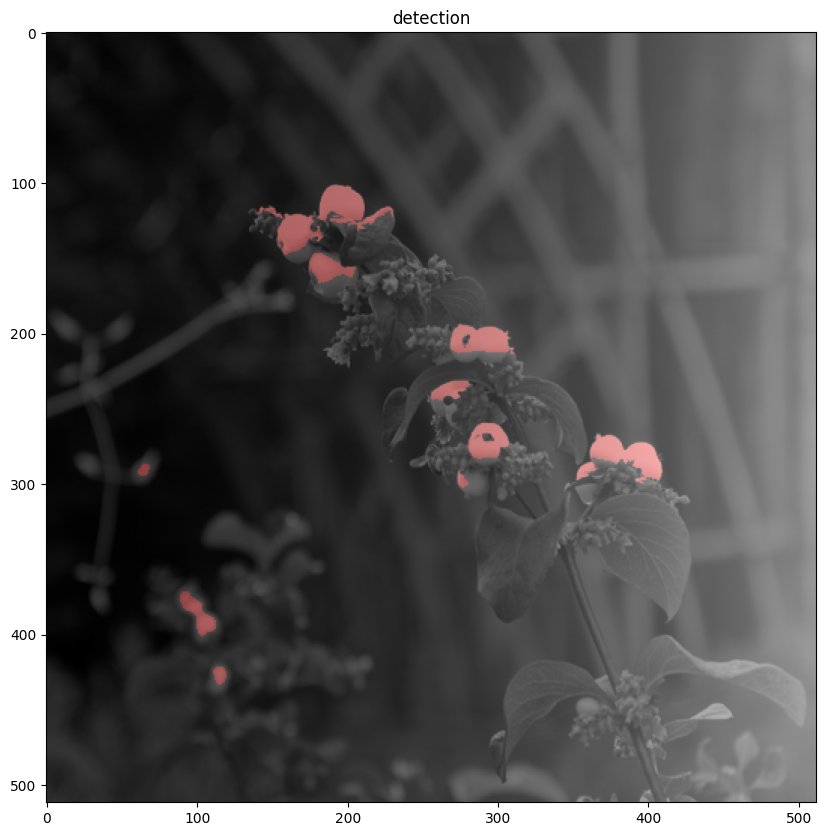

In [ ]:
blend_mask = binview(X, S, 'r', 1)

plt.figure(figsize=(10,10))
plt.imshow(blend_mask,cmap='gray')
plt.title('detection')
plt.show()

